In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

imagesDir = 'images'

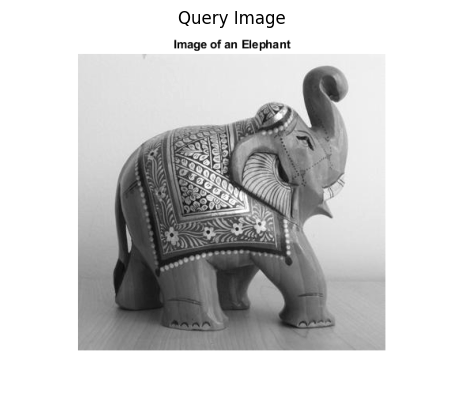

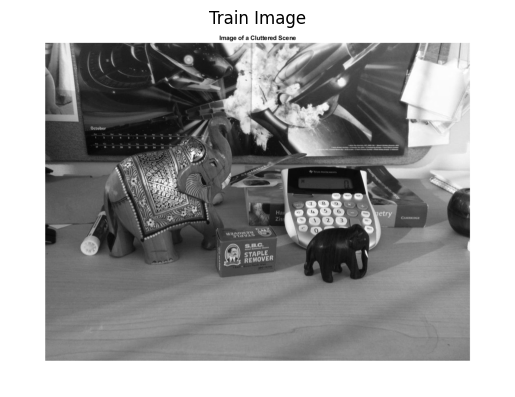

In [67]:
query = cv2.imread(os.path.join(imagesDir, 'match_scene01_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_scene01_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

In [68]:
img1_gray = cv2.imread("images/match_box1a_1.png", cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread("images/match_box1a_2.png", cv2.IMREAD_GRAYSCALE)


[ WARN:0@1953.661] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('images/match_box1a_1.png'): can't open/read file: check file path/integrity
[ WARN:0@1953.662] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('images/match_box1a_2.png'): can't open/read file: check file path/integrity


## SIFT

In [69]:
sift = cv2.SIFT_create()

# find the keypoints with SIFT
kp = sift.detect(query, None)

# compute the descriptors with SIFT
kp, des = sift.compute(query, kp)


fkp = sift.detect(train, None)

# compute the descriptors with ORB
fkp, fdes = sift.compute(train, fkp)

### RANSAC

In [70]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors.
matches = bf.match(des, fdes)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [71]:
if len(matches)>10:
    src_pts = np.float32([ kp[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ fkp[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = query.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)

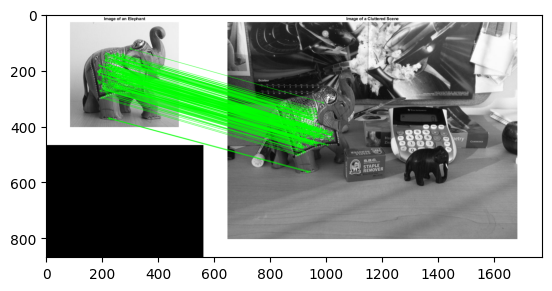

(<matplotlib.image.AxesImage at 0x7f2ecdb31160>, None)

In [72]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(query,kp,train,fkp,matches,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

### Lowe's test

In [73]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des,fdes,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

In [74]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

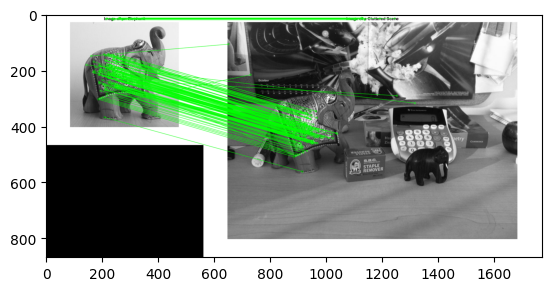

(<matplotlib.image.AxesImage at 0x7f2ecdadccd0>, None)

In [75]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)
img3 = cv2.drawMatchesKnn(query,kp,train,fkp,matches,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

## ORB

In [76]:
orb = cv2.ORB_create()

kp, des = orb.detectAndCompute(query, None)
fkp, fdes = orb.detectAndCompute(train, None)

### RANSAC

In [77]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des, fdes)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [78]:
if len(matches)>10:
    src_pts = np.float32([ kp[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ fkp[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = train.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)

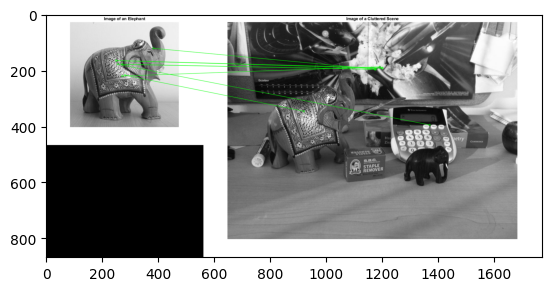

(<matplotlib.image.AxesImage at 0x7f2ecdb17fd0>, None)

In [79]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(query,kp,train,fkp,matches,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

### Lowe's test

In [80]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des,fdes,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

In [81]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

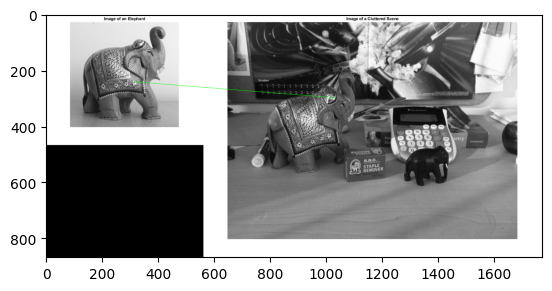

(<matplotlib.image.AxesImage at 0x7f2ecd9eebb0>, None)

In [82]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)
img3 = cv2.drawMatchesKnn(query,kp,train,fkp,matches,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()